In [16]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

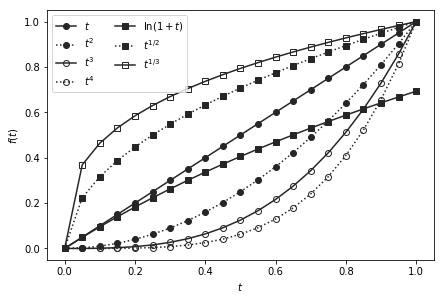

In [40]:
import mpltex3

# @mpltex3.aps_decorator
def my_plot(t):
    fig, ax = plt.subplots(1)
    # linestyles = mpltex3.linestyle_generator()
    linestyles = mpltex3.linestyle_generator(colors=[],
                                        lines=['-',':'],
                                        markers=['o','s'],
                                        hollow_styles=[False, False, True, True])
    
    ax.plot(t, t, label='$t$', **next(linestyles))
    ax.plot(t, t**2, label='$t^2$', **next(linestyles))
    ax.plot(t, t**3, label='$t^3$', **next(linestyles))
    ax.plot(t, t**4, label='$t^4$', **next(linestyles))
    ax.plot(t, np.log(1+t), label='$\ln(1+t)$', **next(linestyles))
    ax.plot(t, t**(1./2), label='$t^{1/2}$', **next(linestyles))
    ax.plot(t, t**(1./3), label='$t^{1/3}$', **next(linestyles))

    ax.set_xlabel('$t$')
    ax.set_ylabel('$f(t)$')
    ax.legend(loc='best', ncol=2)
    fig.tight_layout(pad=0.1)
    fig.savefig('mpltex-acs-line-markers')

t = np.arange(0, 1.0+0.05, 0.05)
my_plot(t)

In [5]:
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k']) *
              cycler('linestyle', ['-', '--', ':', '=.']) *
              cycler('marker', ['^',',', '.']))

# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
for i, item in zip(range(15), monochrome()):
    print(i, item)

number of items in monochrome: 12
0 {'color': 'k', 'linestyle': '-', 'marker': '^'}
1 {'color': 'k', 'linestyle': '-', 'marker': ','}
2 {'color': 'k', 'linestyle': '-', 'marker': '.'}
3 {'color': 'k', 'linestyle': '--', 'marker': '^'}
4 {'color': 'k', 'linestyle': '--', 'marker': ','}
5 {'color': 'k', 'linestyle': '--', 'marker': '.'}
6 {'color': 'k', 'linestyle': ':', 'marker': '^'}
7 {'color': 'k', 'linestyle': ':', 'marker': ','}
8 {'color': 'k', 'linestyle': ':', 'marker': '.'}
9 {'color': 'k', 'linestyle': '=.', 'marker': '^'}
10 {'color': 'k', 'linestyle': '=.', 'marker': ','}
11 {'color': 'k', 'linestyle': '=.', 'marker': '.'}
12 {'color': 'k', 'linestyle': '-', 'marker': '^'}
13 {'color': 'k', 'linestyle': '-', 'marker': ','}
14 {'color': 'k', 'linestyle': '-', 'marker': '.'}


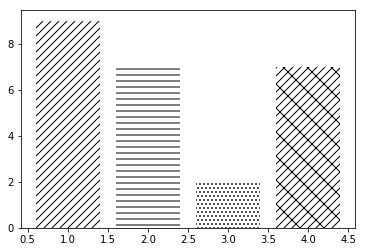

In [18]:
fig, ax = plt.subplots(1,1)

bar_cycle = (cycler('hatch', ['///', '--', '...','\///', 'xxx', '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()

for x in range(1,5):
    ax.bar(x, np.random.randint(2,10), **next(styles))

In [13]:
data_folder = './output_tsne'

datasets={
    "MNIST mini": "MNIST-SMALL",
    "COIL-20": "COIL20",
    "MNIST 2000 samples": "MNIST-2000",
    "Country Indicators 1999": "COUNTRY1999",
    "Country Indicators 2013": "COUNTRY2013",
    "Country Indicators 2014": "COUNTRY2014",
    "Country Indicators 2015": "COUNTRY2015",
    "Cars and Trucks 2004": "CARS04",
    "Breast Cancer Wisconsin (Diagnostic)": "BREAST-CANCER95",
    "Pima Indians Diabetes": "DIABETES",
    "Multidimensional Poverty Measures": "MPI"
}

In [7]:
line_names = {
    'Negative log likelihood in low dim.': 'q_link',
    'Negative log likelihood in high dim.': 'p_link',
    'KL-loss': 'loss',
    'AUC R_NX': 'auc_rnx',
    'CorrCoef': 'pearsonr',
    'MDS Stress': 'mds_isotonic',
    'CCA Stress': 'cca_stress',
    'Sammon NLM': 'sammon_nlm'
}

In [10]:
needed_columns = [
    'q_link', 'q_ml', 'q_cl',
    'p_link', 'p_ml', 'p_cl',
    'auc_rnx', 'mds_isotonic', 'cca_stress', 'sammon_nlm', 'pearsonr'
]

In [8]:
def _normalize_0_1(arr):
    return (arr - arr.max()) / -np.ptp(arr)

def _standardize(arr):
    return (arr - arr.mean()) / arr.std()

In [22]:
def load_df(dataset_name, filter_perp = True, lr=100.0, standardize=True, log_scale=True):
    """Load data from pickle file
        The result is a list of object (dict), which then be converted into pandas dataframe
    """
    if dataset_name == "": return None
    
    in_name = '{}/tsne_{}.pkl'.format(data_folder, dataset_name)
    pkl_data = pickle.load(open(in_name, 'rb'))
    embeddeds = pkl_data['results']
    df = pd.DataFrame.from_records(embeddeds, exclude=["embedding"])
    
    if lr is not None:
        df = df[df['learning_rate']==lr]
    if filter_perp:
        df = df[(df['perplexity']<1000) & (df['perplexity']>=1.0)]
    if standardize:
        cs = needed_columns
        df[cs] = (df[cs] - df[cs].mean()) / df[cs].std()
    if log_scale:
        df['perplexity'] = np.log(df['perplexity'])

    return df

In [23]:
dataset_name = 'MNIST-SMALL'
df = load_df(dataset_name)

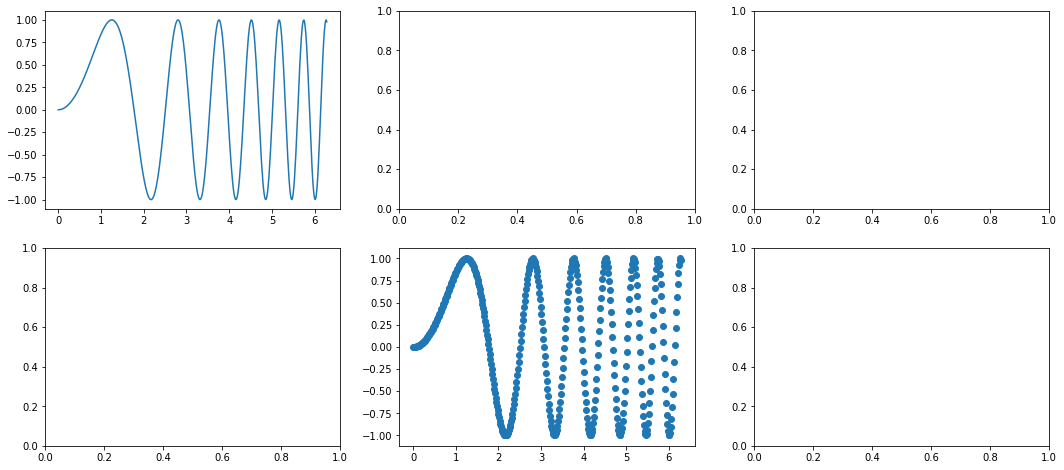

In [39]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

from cycler import cycler
color_c = cycler('color', ['k'])
style_c = cycler('linestyle', ['-', '--', ':', '-.'])
markr_c = cycler('marker', ['', '.', 'o'])
c_cms = color_c * markr_c * style_c
c_csm = color_c * style_c * markr_c
    
fig, axes = plt.subplots(2, 3, figsize=(18,8))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

In [47]:
def plot_t():
    fig, ax = plt.subplots(1)
    # linestyles = mpltex3.linestyle_generator()
    linestyles = mpltex3.linestyle_generator(colors=[],
                                        lines=['-',':', '--'],
                                        markers=['o','', '.'],
                                        hollow_styles=[False, False, True, True])

    t = df['perplexity']
    for line in needed_columns:
        ax.plot(t, df[line], **next(linestyles))
    
#     ax.plot(t, df['q', label='$t$', **next(linestyles))
#     ax.plot(t, t**2, label='$t^2$', **next(linestyles))
#     ax.plot(t, t**3, label='$t^3$', **next(linestyles))
#     ax.plot(t, t**4, label='$t^4$', **next(linestyles))
#     ax.plot(t, np.log(1+t), label='$\ln(1+t)$', **next(linestyles))
#     ax.plot(t, t**(1./2), label='$t^{1/2}$', **next(linestyles))
#     ax.plot(t, t**(1./3), label='$t^{1/3}$', **next(linestyles))

#     ax.set_xlabel('$t$')
#     ax.set_ylabel('$f(t)$')
#     ax.legend(loc='best', ncol=2)
    fig.tight_layout(pad=0.1)

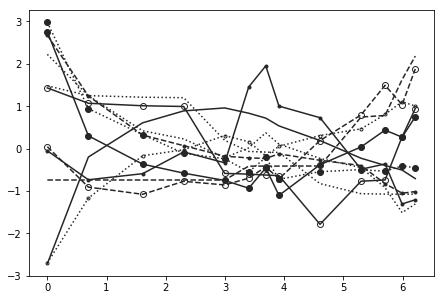

In [48]:
plot_t()